In [2]:
import pandas as pd
import numpy as np
from utils.Models import kfold_lightgbm
from utils.preprocessing import one_hot_encoder
from utils.preprocessing import missing_values_table

/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
dataset = pd.read_csv('Feature/feature_matrix.csv')

In [3]:
missing_table = missing_values_table(dataset)

There are total 1698 columns.
1636 of them have missing values.


In [4]:
# Dump the features that more than 30% of the records are missing.
dump_feats = missing_table[missing_table['% of Total Values'] > 30].index.tolist()

dataset = dataset.drop(dump_feats, axis = 1)

In [5]:
dataset, _ = one_hot_encoder(dataset)

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer

Target = dataset['TARGET']
ID = dataset['SK_ID_CURR']

dataset_temp = dataset.drop(['TARGET','SK_ID_CURR'], axis = 1)

imputer = Imputer(strategy = 'median')
scaler = MinMaxScaler(feature_range = (0,1))

dataset_preprocessed = imputer.fit_transform(dataset_temp)
dataset_preprocessed = scaler.fit_transform(dataset_preprocessed)
dataset_preprocessed = pd.DataFrame(dataset_preprocessed, columns = dataset_temp.columns)

dataset_preprocessed['TARGET'] = Target
dataset_preprocessed['SK_ID_CURR'] = ID

Starting LightGBM. Train shape: (307511, 1107), test shape: (48744, 1107)
Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.232941	training's auc: 0.801556	valid_1's binary_logloss: 0.241219	valid_1's auc: 0.776829
[400]	training's binary_logloss: 0.221726	training's auc: 0.830507	valid_1's binary_logloss: 0.238433	valid_1's auc: 0.783855
[600]	training's binary_logloss: 0.213227	training's auc: 0.852479	valid_1's binary_logloss: 0.237715	valid_1's auc: 0.785679
[800]	training's binary_logloss: 0.205769	training's auc: 0.870326	valid_1's binary_logloss: 0.237536	valid_1's auc: 0.785872
[1000]	training's binary_logloss: 0.198943	training's auc: 0.885333	valid_1's binary_logloss: 0.237419	valid_1's auc: 0.786082
[1200]	training's binary_logloss: 0.192674	training's auc: 0.898343	valid_1's binary_logloss: 0.237314	valid_1's auc: 0.786198
Early stopping, best iteration is:
[1196]	training's binary_logloss: 0.192794	training's auc: 0.898086	va

/home/ec2-user/Data-x-Project/utils/Models.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_df['TARGET'] = sub_preds
/home/ec2-user/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


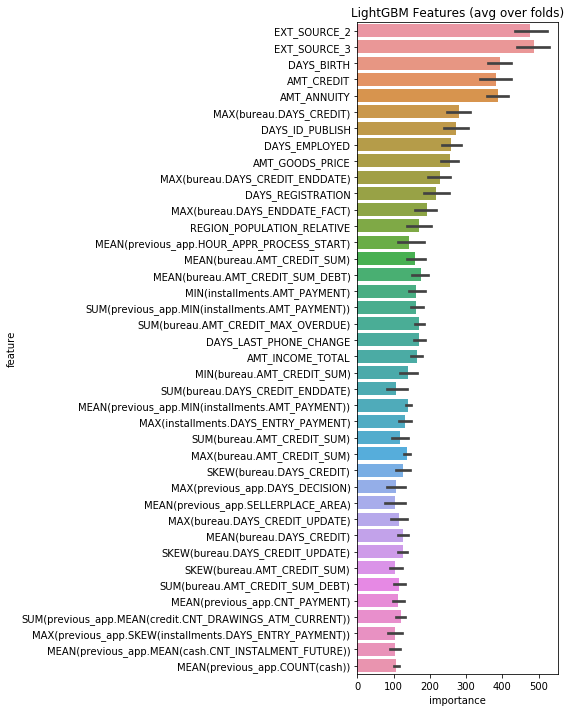

In [7]:
feat_importance = kfold_lightgbm(dataset_preprocessed, 5, debug = False, name = 'full_feature_matrix')

In [8]:
feat_importance.to_csv('Feature_importance_full_feature_matrix.csv')

### Using specific antomatedly generated features to train the model. (Feature Selection)

In [2]:
dataset = pd.read_csv('Feature/feature_matrix_spec.csv')

In [3]:
missing_table = missing_values_table(dataset)

There are total 885 columns.
823 of them have missing values.


In [4]:
# Dump the features that more than 30% of the records are missing.
dump_feats = missing_table[missing_table['% of Total Values'] > 30].index.tolist()

dataset = dataset.drop(dump_feats, axis = 1)

In [5]:
dataset, _ = one_hot_encoder(dataset)

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer

Target = dataset['TARGET']
ID = dataset['SK_ID_CURR']

dataset_temp = dataset.drop(['TARGET','SK_ID_CURR'], axis = 1)

imputer = Imputer(strategy = 'median')
scaler = MinMaxScaler(feature_range = (0,1))

dataset_preprocessed = imputer.fit_transform(dataset_temp)
dataset_preprocessed = scaler.fit_transform(dataset_preprocessed)
dataset_preprocessed = pd.DataFrame(dataset_preprocessed, columns = dataset_temp.columns)

dataset_preprocessed['TARGET'] = Target
dataset_preprocessed['SK_ID_CURR'] = ID

Starting LightGBM. Train shape: (307511, 791), test shape: (48744, 791)
Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.233843	training's auc: 0.799278	valid_1's binary_logloss: 0.240816	valid_1's auc: 0.776816
[400]	training's binary_logloss: 0.223253	training's auc: 0.82638	valid_1's binary_logloss: 0.238115	valid_1's auc: 0.783574
[600]	training's binary_logloss: 0.215272	training's auc: 0.847401	valid_1's binary_logloss: 0.237476	valid_1's auc: 0.785275
[800]	training's binary_logloss: 0.208195	training's auc: 0.864559	valid_1's binary_logloss: 0.237246	valid_1's auc: 0.78584
[1000]	training's binary_logloss: 0.201709	training's auc: 0.879356	valid_1's binary_logloss: 0.237186	valid_1's auc: 0.78589
[1200]	training's binary_logloss: 0.195736	training's auc: 0.89225	valid_1's binary_logloss: 0.237093	valid_1's auc: 0.786071
[1400]	training's binary_logloss: 0.19002	training's auc: 0.90385	valid_1's binary_logloss: 0.237027	valid_1's 

/home/ec2-user/Data-x-Project/utils/Models.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_df['TARGET'] = sub_preds
/home/ec2-user/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


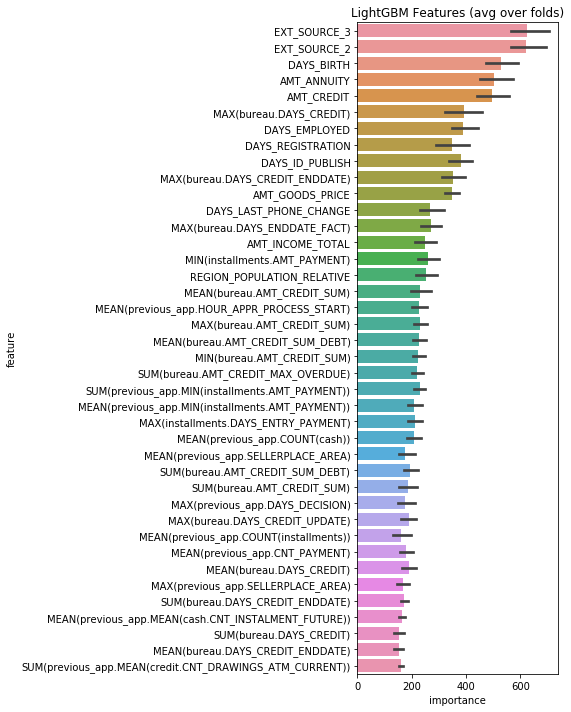

In [7]:
feat_importance = kfold_lightgbm(dataset_preprocessed, 5, debug = False, name = 'full_feature_matrix')

In [8]:
feat_importance.to_csv('Feature_importance_spec_feature_matrix.csv')

In [12]:
del dataset

### Try reduce the dimension of specific features.

In [3]:
spec_feat_importance = pd.read_csv('Feature_importance_spec_feature_matrix.csv')

In [4]:
spec_feat_importance = spec_feat_importance.drop(['Unnamed: 0', 'fold'], axis = 1)

In [5]:
spec_feat_importance = spec_feat_importance.groupby('feature', as_index = False).mean().sort_values('importance', ascending = False)

In [6]:
spec_feat_importance = spec_feat_importance[spec_feat_importance['importance'] != 0].reset_index(drop = True)

In [7]:
spec_feat_importance.to_csv('Feature_importance_spec_feature_matrix.csv')

In [19]:
feats = spec_feat_importance['feature'].tolist()

In [10]:
feat_numbers = np.linspace(0, len(feats), 10).astype(int)
feat_numbers = np.delete(feat_numbers, 0)
feat_numbers

array([ 72, 145, 218, 290, 363, 436, 508, 581, 654])

In [11]:
spec_feature = pd.read_csv('Feature/feature_matrix_spec.csv')

In [20]:
missing_table = missing_values_table(spec_feature)

dump_feats = missing_table[missing_table['% of Total Values'] > 30].index.tolist()

spec_feature = spec_feature.drop(dump_feats, axis = 1)

spec_feature, _ = one_hot_encoder(spec_feature)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer

Target = spec_feature['TARGET']
ID = spec_feature['SK_ID_CURR']

dataset_temp = spec_feature.drop(['TARGET','SK_ID_CURR'], axis = 1)

imputer = Imputer(strategy = 'median')
scaler = MinMaxScaler(feature_range = (0,1))

dataset_preprocessed = imputer.fit_transform(dataset_temp)
dataset_preprocessed = scaler.fit_transform(dataset_preprocessed)
dataset_preprocessed = pd.DataFrame(dataset_preprocessed, columns = dataset_temp.columns)

dataset_preprocessed['TARGET'] = Target
dataset_preprocessed['SK_ID_CURR'] = ID

There are total 885 columns.
823 of them have missing values.


In [26]:
from tqdm import tqdm
ROC_AUC_ALL= []
for num in tqdm(feat_numbers):
    feat_part = feats[:num]
    data = dataset_preprocessed[feat_part]
    data['TARGET'] = Target
    data['SK_ID_CURR'] = ID
    ROC_AUC = kfold_lightgbm(data, 5, debug = False, 
                             name = f'spec_feature_{num}', importance = False, AUC = True)
    ROC_AUC_ALL.append(ROC_AUC)

  0%|          | 0/9 [00:00<?, ?it/s]/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Starting LightGBM. Train shape: (307511, 74), test shape: (48744, 74)
Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.237031	training's auc: 0.79001	valid_1's binary_logloss: 0.246255	valid_1's auc: 0.757106
[400]	training's binary_logloss: 0.228444	training's auc: 0.814351	valid_1's binary_logloss: 0.244784	valid_1's auc: 0.761502
[600]	training's binary_logloss: 0.221525	training's auc: 0.83387	valid_1's binary_logloss: 0.244446	valid_1's auc: 0.762602
[800]	training's binary_logloss: 0.215303	training's auc: 0.850707	valid_1's binary_logloss: 0.244379	valid_1's auc: 0.76287
[1000]	training's binary_logloss: 0.209562	training's auc: 0.864788	valid_1's binary_logloss: 0.244288	valid_1's auc: 0.763304
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.211074	training's auc: 0.861123	valid_1's binary_logloss: 0.244259	valid_1's auc: 0.763345
Fold  1 AUC: 0.763345
Training until validation scores don't improve for 200 r

/home/ec2-user/Data-x-Project/utils/Models.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_df['TARGET'] = sub_preds
 11%|█         | 1/9 [02:45<22:00, 165.10s/it]/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

Starting LightGBM. Train shape: (307511, 147), test shape: (48744, 147)
Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.234857	training's auc: 0.796798	valid_1's binary_logloss: 0.242176	valid_1's auc: 0.772234
[400]	training's binary_logloss: 0.224851	training's auc: 0.823353	valid_1's binary_logloss: 0.239889	valid_1's auc: 0.77846
[600]	training's binary_logloss: 0.217233	training's auc: 0.844021	valid_1's binary_logloss: 0.239588	valid_1's auc: 0.778978
[800]	training's binary_logloss: 0.210389	training's auc: 0.861014	valid_1's binary_logloss: 0.239475	valid_1's auc: 0.779291
[1000]	training's binary_logloss: 0.204139	training's auc: 0.875785	valid_1's binary_logloss: 0.239415	valid_1's auc: 0.779375
Early stopping, best iteration is:
[960]	training's binary_logloss: 0.205305	training's auc: 0.873106	valid_1's binary_logloss: 0.239395	valid_1's auc: 0.779471
Fold  1 AUC: 0.779471
Training until validation scores don't improve for 2

/home/ec2-user/Data-x-Project/utils/Models.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_df['TARGET'] = sub_preds
 22%|██▏       | 2/9 [06:49<22:02, 188.89s/it]/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

Starting LightGBM. Train shape: (307511, 220), test shape: (48744, 220)
Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.233872	training's auc: 0.79923	valid_1's binary_logloss: 0.243071	valid_1's auc: 0.769157
[400]	training's binary_logloss: 0.223486	training's auc: 0.826737	valid_1's binary_logloss: 0.240661	valid_1's auc: 0.774924
[600]	training's binary_logloss: 0.215632	training's auc: 0.847252	valid_1's binary_logloss: 0.240202	valid_1's auc: 0.775937
[800]	training's binary_logloss: 0.208794	training's auc: 0.863972	valid_1's binary_logloss: 0.239998	valid_1's auc: 0.776324
[1000]	training's binary_logloss: 0.202418	training's auc: 0.87885	valid_1's binary_logloss: 0.239942	valid_1's auc: 0.776424
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.206668	training's auc: 0.869228	valid_1's binary_logloss: 0.239913	valid_1's auc: 0.776612
Fold  1 AUC: 0.776612
Training until validation scores don't improve for 20

/home/ec2-user/Data-x-Project/utils/Models.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_df['TARGET'] = sub_preds
 33%|███▎      | 3/9 [12:13<22:56, 229.41s/it]/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

Starting LightGBM. Train shape: (307511, 292), test shape: (48744, 292)
Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.232898	training's auc: 0.80105	valid_1's binary_logloss: 0.24439	valid_1's auc: 0.766459
[400]	training's binary_logloss: 0.22226	training's auc: 0.828019	valid_1's binary_logloss: 0.24239	valid_1's auc: 0.771873
[600]	training's binary_logloss: 0.214327	training's auc: 0.848186	valid_1's binary_logloss: 0.242168	valid_1's auc: 0.772517
[800]	training's binary_logloss: 0.207342	training's auc: 0.865332	valid_1's binary_logloss: 0.242202	valid_1's auc: 0.772517
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.213023	training's auc: 0.851517	valid_1's binary_logloss: 0.242123	valid_1's auc: 0.772674
Fold  1 AUC: 0.772674
Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.233465	training's auc: 0.799849	valid_1's binary_logloss: 0.242578	valid_1's auc: 0.

/home/ec2-user/Data-x-Project/utils/Models.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_df['TARGET'] = sub_preds
 44%|████▍     | 4/9 [18:31<22:49, 273.85s/it]/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

Starting LightGBM. Train shape: (307511, 365), test shape: (48744, 365)
Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.233622	training's auc: 0.799147	valid_1's binary_logloss: 0.241913	valid_1's auc: 0.773711
[400]	training's binary_logloss: 0.223112	training's auc: 0.825963	valid_1's binary_logloss: 0.239239	valid_1's auc: 0.780661
[600]	training's binary_logloss: 0.215189	training's auc: 0.846706	valid_1's binary_logloss: 0.238544	valid_1's auc: 0.782808
[800]	training's binary_logloss: 0.208065	training's auc: 0.86417	valid_1's binary_logloss: 0.23839	valid_1's auc: 0.783171
[1000]	training's binary_logloss: 0.201703	training's auc: 0.878587	valid_1's binary_logloss: 0.238266	valid_1's auc: 0.783524
[1200]	training's binary_logloss: 0.195775	training's auc: 0.891141	valid_1's binary_logloss: 0.238242	valid_1's auc: 0.783658
Early stopping, best iteration is:
[1102]	training's binary_logloss: 0.198632	training's auc: 0.885248	valid_

/home/ec2-user/Data-x-Project/utils/Models.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_df['TARGET'] = sub_preds
 56%|█████▌    | 5/9 [26:19<22:09, 332.39s/it]/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

Starting LightGBM. Train shape: (307511, 438), test shape: (48744, 438)
Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.233523	training's auc: 0.799846	valid_1's binary_logloss: 0.241986	valid_1's auc: 0.774975
[400]	training's binary_logloss: 0.222943	training's auc: 0.827529	valid_1's binary_logloss: 0.239295	valid_1's auc: 0.781715
[600]	training's binary_logloss: 0.215098	training's auc: 0.847881	valid_1's binary_logloss: 0.238846	valid_1's auc: 0.782862
[800]	training's binary_logloss: 0.208127	training's auc: 0.864921	valid_1's binary_logloss: 0.238682	valid_1's auc: 0.783233
[1000]	training's binary_logloss: 0.201755	training's auc: 0.879215	valid_1's binary_logloss: 0.238707	valid_1's auc: 0.783039
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.20597	training's auc: 0.869835	valid_1's binary_logloss: 0.238607	valid_1's auc: 0.783459
Fold  1 AUC: 0.783459
Training until validation scores don't improve for 2

/home/ec2-user/Data-x-Project/utils/Models.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_df['TARGET'] = sub_preds
 67%|██████▋   | 6/9 [34:38<19:06, 382.09s/it]/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

Starting LightGBM. Train shape: (307511, 510), test shape: (48744, 510)
Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.233602	training's auc: 0.800252	valid_1's binary_logloss: 0.241965	valid_1's auc: 0.773079
[400]	training's binary_logloss: 0.222869	training's auc: 0.827451	valid_1's binary_logloss: 0.239246	valid_1's auc: 0.779531
[600]	training's binary_logloss: 0.215011	training's auc: 0.847881	valid_1's binary_logloss: 0.238653	valid_1's auc: 0.780992
[800]	training's binary_logloss: 0.207989	training's auc: 0.865158	valid_1's binary_logloss: 0.238406	valid_1's auc: 0.781513
[1000]	training's binary_logloss: 0.201484	training's auc: 0.88004	valid_1's binary_logloss: 0.238335	valid_1's auc: 0.781668
[1200]	training's binary_logloss: 0.195573	training's auc: 0.892425	valid_1's binary_logloss: 0.238266	valid_1's auc: 0.781714
Early stopping, best iteration is:
[1068]	training's binary_logloss: 0.199352	training's auc: 0.884601	valid

/home/ec2-user/Data-x-Project/utils/Models.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_df['TARGET'] = sub_preds
 78%|███████▊  | 7/9 [43:51<14:27, 433.60s/it]/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

Starting LightGBM. Train shape: (307511, 583), test shape: (48744, 583)
Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.233032	training's auc: 0.801757	valid_1's binary_logloss: 0.243823	valid_1's auc: 0.765201
[400]	training's binary_logloss: 0.222334	training's auc: 0.828773	valid_1's binary_logloss: 0.241425	valid_1's auc: 0.772226
[600]	training's binary_logloss: 0.214486	training's auc: 0.848778	valid_1's binary_logloss: 0.241029	valid_1's auc: 0.773367
[800]	training's binary_logloss: 0.207488	training's auc: 0.865769	valid_1's binary_logloss: 0.240901	valid_1's auc: 0.77374
[1000]	training's binary_logloss: 0.201073	training's auc: 0.880301	valid_1's binary_logloss: 0.240867	valid_1's auc: 0.773847
Early stopping, best iteration is:
[966]	training's binary_logloss: 0.20213	training's auc: 0.877935	valid_1's binary_logloss: 0.240857	valid_1's auc: 0.773909
Fold  1 AUC: 0.773909
Training until validation scores don't improve for 20

/home/ec2-user/Data-x-Project/utils/Models.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_df['TARGET'] = sub_preds
 89%|████████▉ | 8/9 [52:57<07:47, 467.36s/it]/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

Starting LightGBM. Train shape: (307511, 656), test shape: (48744, 656)
Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.233034	training's auc: 0.801321	valid_1's binary_logloss: 0.243738	valid_1's auc: 0.767984
[400]	training's binary_logloss: 0.22234	training's auc: 0.828401	valid_1's binary_logloss: 0.241384	valid_1's auc: 0.774757
[600]	training's binary_logloss: 0.214432	training's auc: 0.848428	valid_1's binary_logloss: 0.240757	valid_1's auc: 0.776657
[800]	training's binary_logloss: 0.207384	training's auc: 0.865455	valid_1's binary_logloss: 0.240536	valid_1's auc: 0.777283
[1000]	training's binary_logloss: 0.200898	training's auc: 0.880176	valid_1's binary_logloss: 0.240404	valid_1's auc: 0.777724
Early stopping, best iteration is:
[957]	training's binary_logloss: 0.202317	training's auc: 0.876947	valid_1's binary_logloss: 0.240382	valid_1's auc: 0.777748
Fold  1 AUC: 0.777748
Training until validation scores don't improve for 2

/home/ec2-user/Data-x-Project/utils/Models.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_df['TARGET'] = sub_preds
100%|██████████| 9/9 [1:02:24<00:00, 497.12s/it]


In [27]:
ROC_AUC_ALL

[0.7671991298206753,
 0.7770709789921382,
 0.7783547688007629,
 0.7796092735748088,
 0.7804228018406567,
 0.7802052041430018,
 0.7803866341895515,
 0.7802452800658144,
 0.7800605788527017]

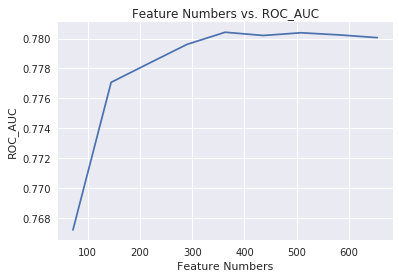

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.plot(feat_numbers, ROC_AUC_ALL)
plt.title('Feature Numbers vs. ROC_AUC')
plt.xlabel('Feature Numbers')
plt.ylabel('ROC_AUC')
sns.set()
